***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [2. Mathematical Groundwork](2_0_introduction.ipynb)
    * Previous: [Complex Numbers](2_1_complex_numbers.ipynb)
    * Next: [Fourier Series](2_3_fourier_series.ipynb)

***

#### Chapter Editors
* UA Mbou Sob

#### Chapter Contributors

* Gyula I. G. Józsa

Import standard modules:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Import section specific modules:

In [2]:
pass

## 2.2. Important functions<a id='math:sec:important_functions'></a>

We introduce a set of functions that will turn up frequently in this book or have an important status in interferometry or signal processing in general. A fundamental knowledge of basic functions in calculus is a prerequisite. In particular, we assume that the <cite data-cite='wiki:trigonometric_functions'>trigonometric functions</cite> [CITE](https://en.wikipedia.org/wiki/Trigonometric_functions) $\cos$, $\sin$, $\tan$, their inverses $\arcsin$, $\arccos$, $\arctan$, as well as the <cite data-cite='wiki:exponential_function'>exponential function</cite> [CITE](https://en.wikipedia.org/wiki/Exponential_function) $e^x = \exp(x)$ and its inverse, the natural logarithm $\ln{x}$, are well known.

1. [Gaussian function](#math:sec:gaussian_function)
2. [Sync function](#math:sec:sync_function)
3. [Heaviside (step) function](#math:sec:heaviside_function)
4. [Dirac delta function](#math:sec:dirac_delta_function)
5. [Shah function](#math:sec:shah_function)
6. [Rectangle function](#math:sec:Rectangle_function)

### 2.2.1. Gaussian function<a id='math:sec:gaussian_function'></a>

A Gaussian function also known as bell function is defined as 

<a id='math:eq:2_001'></a><!--\label{math:eq:2_001}-->$$
f(x) = a e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

where $a$, is the amplitude, $\mu$ is the mean and $\sigma$ is the standard deviation. 

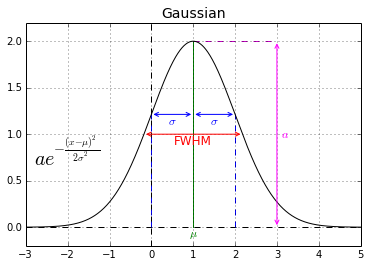

In [7]:
def gaussian(x, a, mu, sig):
    return a*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def plotgaussian(a, mu, sigma):

    # Plotting range
    xrange = [mu-4.*sigma,mu+4.*sigma]

    # Create Gaussian
    x = np.linspace(xrange[0], xrange[1], 900)
    y = gaussian(x, a, mu, sigma)

    # To illustrate the meaning of sigma calculate mu+sigma and mu-sigma
    siglleft = mu-sigma
    siglright = mu+sigma
    sigh = gaussian(mu+sigma, a, mu, sigma)

    # To plot FWHM arrows calculate mu+HWHM and mu-HWHM
    hwhmleft = -np.sqrt(2.*np.log(2.))*sigma+mu
    hwhmright = np.sqrt(2.*np.log(2.))*sigma+mu
    hm = a/2.

    # Start the plot, create a figure instance and a subplot
    fig = plt.figure()
    ax  = fig.add_subplot(111)

    # Axis ranges
    ax.axis([mu-4.*sigma, mu+4.*sigma, -a*0.1, a*1.1])

    # Plot a grid
    ax.grid(True)

    # Insert lines at x=0 and y=0
    ax.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')

    # Draw a line to mark the position a
    ax.plot([mu,mu],[0.,a], 'g-')

    # Draw lines for sigma area
    ax.plot([siglleft, siglleft],[0.,sigh], 'b--')
    ax.plot([siglright, siglright],[0.,sigh], 'b--')

    # Draw line to show amplitude
    ax.plot([mu, mu+2*sigma],[a,a], 'm--')


    # Plot the function
    ax.plot(x,y, 'k-')

    # Show amplitude
    plt.annotate(s='', xy=(mu+2*sigma,0.), xytext=(mu+2*sigma,a), arrowprops=dict(color = 'magenta', arrowstyle='<->'))
    ax.text(mu+2*sigma+sigma/10., a/2, '$a$', fontsize = 12, horizontalalignment = 'left', verticalalignment = 'center', color = 'magenta')

    # Overplot FHHM
    plt.annotate(s='', xy=(hwhmleft,hm), xytext=(hwhmright,hm), arrowprops=dict(color = 'red', arrowstyle='<->'))
    ax.text(mu, hm, 'FWHM', fontsize = 12, horizontalalignment = 'center', verticalalignment = 'top', color = 'red')

    # Overplot sigma
    plt.annotate(s='', xy=(siglleft,sigh), xytext=(mu,sigh), arrowprops=dict(color = 'blue', arrowstyle='<->'))
    ax.text((siglleft+mu)/2, sigh, '$\sigma$', fontsize = 12, horizontalalignment = 'center', verticalalignment = 'top', color = 'blue')
    plt.annotate(s='', xy=(siglright,sigh), xytext=(mu,sigh), arrowprops=dict(color = 'blue', arrowstyle='<->'))
    ax.text((siglright+mu)/2, sigh, '$\sigma$', fontsize = 12, horizontalalignment = 'center', verticalalignment = 'top', color = 'blue')

    # Mark position of mu
    ax.text(mu, 0., '$\mu$', fontsize = 12, horizontalalignment = 'center', verticalalignment = 'top', color = 'green')
    
    #Formula
#    ax.text(mu, 0., r'$a\cdot e^{-\\frac{(x-\mu)^2}{2\sigma^2}}\mu$', fontsize = 12, horizontalalignment = 'center', verticalalignment = 'top', color = 'green')
    ax.text(mu-3.8*sigma, a/2, r'$a e^{-\frac{(x-\mu)^2}{2\sigma^2}}$', fontsize = 20, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')

    plt.title("Gaussian", fontsize=14,color='black')
    
plotgaussian(2., 1., 1.)

Its Full Width at Half Maximum ($FWHM$), the total width between the two points where the Gaussian function reaches half of its peak value, can be calculated from its standard deviation $\sigma$. For simplicity consider a Gaussian function with mean $\mu$=0, then we have

<a id='math:eq:2_002'></a><!--\label{math:eq:2_002}-->$$
\begin{align}
a e^{-\frac{x^2}{2\,\sigma^2}} &= \frac{a}{2} &\Leftrightarrow\\
x_{1,2} &= \pm \sqrt{2\ln(2)}\,\sigma&\Rightarrow\\
FWHM &= 2 \sqrt{2\ln(2)}\,\sigma\\
&= \sqrt{ln(256)}\,\sigma\\
&\approx 2.35482\,\sigma\\
\end{align}
$$

The area below a Gaussian is given by

<a id='math:eq:2_003'></a><!--\label{math:eq:2_003}-->$$
\begin{align}
\int_{-\infty}^{+\infty}a e^{-\frac{x^2}{2\,\sigma^2}}dx = a\sqrt{2\pi}\sigma \qquad ,
\end{align}
$$

This can be shown by transforming to polar cordinates and calculating the sqaure of the integral. The normalised Gaussian

<a id='math:eq:2_004'></a><!--\label{math:eq:2_004}-->$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}} \Rightarrow\\
\int_{-\infty}^{+\infty}f(x)dx = 1
$$

is the probability-density function of the normal distribution with mean $\mu$ and variance $\sigma^2$.

In [ ]:
plotgaussian(1/(np.sqrt(2.*np.pi)), 0., 1.)

<span style="background-color:cyan">UA:The I don't really think the rest of this section is necessary.</span>

To describe a two-dimensional instrumental function, often a two-dimensional Gaussian g (normalised to a peak value of 1) is used:

<a id='math:eq:2_005'></a><!--\label{math:eq:2_005}-->$$
\begin{align}
f({\bf x}) &= f(x_1,x_2) = e^{-\left(\frac{x_1^2}{2\,\sigma_1^2}+\frac{x_2^2}{2\,\sigma_2^2}\right)}\\
{\mathbf A} &= 
\left(A_{ij}\right)\\
 &= \left(
\begin{array}{cc}
A_{1 1} & A_{1 2}\\
A_{2 1} & A_{2 2}\\
\end{array}
\right)\\
&=\left(
\begin{array}{cc}
\cos{\alpha} & -\sin{\alpha}\\
\sin{\alpha} &  \cos{\alpha}\\
\end{array}
\right)\\
\left(h({\mathbf A})({\bf x})\right)_i &= \left(h({\mathbf A})(x_1,x_2)\right)_i\\
&= \left({\mathbf A}\cdot{\bf x}\right)_i\\
&= \sum_{j = 1}^2 A_{i j} x_j\\
g({\bf x}) &= f(h^{-1}({\mathbf A})({\bf x}))\\
&= f(h({\mathbf A}^{-1})({\bf x}))\\
&= f(h({\mathbf A}^{T})({\bf x}))\\
\left({\mathbf A}^{T}\right)_{i j} &= \left(A\right)_{j i}\\
 &= \left(
\begin{array}{cc}
A_{1 1} & A_{2 1}\\
A_{1 2} & A_{2 2}\\
\end{array}
\right)\\
&=\left(
\begin{array}{cc}
\cos{\alpha} & \sin{\alpha}\\
-\sin{\alpha} & \cos{\alpha}\\
\end{array}
\right)\\
\end{align}\qquad ,
$$

Where $\alpha$ is the so-called position angle of the Gaussian. Looking behind the formal overhead, $A$ is hence (the matrix representation of) a proper rotation about the position angle $\alpha$ and g simply a rotated version of f. In above equations we recap that the inverse of a function represented by a matrix $\mathbf A$ it the function represented by the inverse of the matrix, that for a matrix $A$ representing a proper rotation (actually any orthogonal matrix), its inverse is identical to it transposed matrix ${\mathbf A}^T = {\mathbf A}^{-1}$ and reminded what a transposed matrix ${\mathbf A}^T$ is. To calculate the area below the two-dimensional Gaussian, one has to know the chain rule for the integral of multidimensional scalar functions:

<a id='math:eq:2_006'></a><!--\label{math:eq:2_006}-->$$
\begin{align}
\int f({\bf x})\,d^n{\bf x} & = \int f(x_1, x_2, \ldots)\,dx_1\,dx_2 \ldots\\
& = \int f({{\bf x}({\bf y})}) \det \left( {\bf \mathbb J}^{(xy)}({\bf y)} \right) \,d^n{\bf y} \\
& = \int f({{\bf x}({\bf y})}) \begin{vmatrix} {\mathbb J}^{(xy)}({\bf y)} \end{vmatrix} \,d^n{\bf y} \\
& = \int f(x_1(y_1, y_2, \ldots), x_2(y_1, y_2, \ldots))
\begin{vmatrix}
\frac{\partial x_i}{\partial y_j}(y_1, y_2, \ldots)
\end{vmatrix}
\,dy_1\,dy_2 \ldots\\
& = \int f(x_1(y_1, y_2, \ldots), x_2(y_1, y_2, \ldots))
\begin{vmatrix}
\frac{\partial x_1}{\partial y_1}(y_1, y_2, \ldots) & \frac{\partial x_1}{\partial y_2}(y_1, y_2, \ldots) & \cdots \\
\frac{\partial x_2}{\partial y_1}(y_1, y_2, \ldots) & \frac{\partial x_2}{\partial y_2}(y_1, y_2, \ldots) & \cdots \\
\vdots & \vdots & \ddots \\
\end{vmatrix}
\,dy_1\,dy_2 \ldots\\
\end{align} \qquad ,
$$

hereby recapping the definition of the Jacobian matrix

<a id='math:eq:2_007'></a><!--\label{math:eq:2_007}-->$$
\begin{align}
{\mathbb J}^{(xy)} &= {\mathbb J} \\
&=  \frac{\partial \left(x_1, x_2, \ldots\right)}{\partial\left(y_1, y_2, \ldots\right)}\\
&= {\mathbf J}^{(xy)}\\
&= D\mathbf{x}\\
&= D_\mathbf{x}\\
&= \left(\begin{matrix}
\frac{\partial x_1}{\partial y_1}(y_1, y_2, \ldots) & \frac{\partial x_1}{\partial y_2}(y_1, y_2, \ldots) & \cdots \\
\frac{\partial x_2}{\partial y_1}(y_1, y_2, \ldots) & \frac{\partial x_2}{\partial y_2}(y_1, y_2, \ldots) & \cdots \\
\vdots & \vdots & \ddots \\
\end{matrix}\right)
\end{align}
$$

and its determinant $\det \left({\mathbb J}^{(xy)}\right) = \begin{vmatrix}\mathbb J^{(xy)}\end{vmatrix}$, also sometimes called a Jacobian (albeit not by us). Additionally, one has to know that the inverse function theorem states that the Jacobian of an inverse of a function is the inverse of the Jacobian of a function. Finally knowing that the determinant of the inverse of a matrix is the inverse of the determinant of a matrix $\mathbf M$

 <a id='math:eq:2_008'></a><!--\label{math:eq:2_008}-->$$
\begin{align}
\mathbf{M}\mathbf{M}^{-1} &= {\mathbb 1} \Rightarrow \\
(\det({\mathbf M}))^{-1} &= \det({\mathbf M}^{-1})
\end{align} \qquad ,
$$

we can evaluate the integral $\int g({\bf x}) \,d^2{\bf x} $by making use of the substitution ${\bf x}({\bf y}) = {\mathbf A}{\bf y}$:

<a id='math:eq:2_009'></a><!--\label{math:eq:2_009}-->$$
\begin{align}
\int g({\bf x}) \,d^2{\bf x} &= \int f(h^{-1}({\mathbf A})({\bf x})) \,d^2{\bf x}\\
&= \int f({\mathbf A}^{-1}\cdot{\bf x}) \,d^2{\bf x}\\&= \int f({\mathbf A}^{-1}\cdot{\bf x}({\bf y})) \begin{vmatrix} {\mathbb J}^{(xy)}({\bf y)} \end{vmatrix}  \,d^2{\bf y}\\
&= \int f({\mathbf A}^{-1}\cdot{\bf x}({\bf y})) \begin{vmatrix}
\frac{\partial x_1}{\partial y_1}(y_1, y_2) & \frac{\partial x_1}{\partial y_2}(y_1, y_2) \\
\frac{\partial x_2}{\partial y_1}(y_1, y_2) & \frac{\partial x_2}{\partial y_2}(y_1, y_2) \\
\end{vmatrix}\,d^2{\bf y}\\
&= \int f({\mathbf A}^{-1}\cdot{\mathbf A}\cdot{\bf y}) \begin{vmatrix}
\cos{\alpha} & -\sin{\alpha} \\
\sin{\alpha} & \cos{\alpha} \\
\end{vmatrix}\,d^2{\bf y}\\
&= \int f({\mathbb 1}\cdot{\bf y})\cdot 1 \,d^2{\bf y}\\
&= \int e^{-\left(\frac{y_1^2}{2\,\sigma_1^2}+\frac{y_2^2}{2\,\sigma_2^2}\right)} \,dy_1\,dy_2\\
&= \left(\int e^{-\left(\frac{y_1^2}{2\,\sigma_1^2}\right)} \,dy_1\right)\left(\int e^{-\left(\frac{y_2^2}{2\,\sigma_2^2}\right)} \,dy_2\right)\\
&=\sqrt{2\pi}\sigma_1\sqrt{2\pi}\sigma_2\\
&= 2\pi\sigma_1\sigma_2\\
&= 2\pi \frac{FWHM_1}{\sqrt{\ln{256}}}\frac{FWHM_2}{\sqrt{\ln{256}}}\\
&\approx 1.13309\,FWHM_1\,FWHM_2
\end{align}\qquad ,
$$

where $FWHM_1$ and $FWHM_2$ are the FWHMs corresponding to $\sigma_1$ and $sigma_2$ respectively. Above identity is often used without realizing that quite a bit of fundamental calculus is going in there and without realizing where it comes from. Since this is a nice opportunity to recap fundamental calculus, we took the opportunity to derive the expression.

### 2.2.2. Sinc function<a id='math:sec:sync_function'></a>

<span style="background-color:cyan">UA: I don't see the need of proving that the function is normalised. If we already know that <a id='math:eq:2_011'></a><!--\label{math:eq:2_011}-->$$
\int_{-\infty}^{\infty} sinc_{\mathrm u}(x) \,dx = \pi
\qquad ,
$$ then all we have to do is divide the function by $\pi$ to define the normalised function</span>

The *Sinc function* $sinc_{\mathrm u}(x)$ is important for sampling theory. Its relevance will become obvious when we will calculate its Fourier transform. The *unnormalized Sinc function* is defined by

<a id='math:eq:2_010'></a><!--\label{math:eq:2_010}-->$$
\begin{split}
sinc_{\mathrm u}(x)   &= \left \{
     \begin{array}{lll}
    1 & {\rm for} &x = 0\\
    \frac{sin x}{x} & {\rm for} & x\neq 0
\end{array} \right.
\end{split}
\qquad ,
$$

and its normalization is

<a id='math:eq:2_011'></a><!--\label{math:eq:2_011}-->$$
\int_{-\infty}^{\infty} sinc_{\mathrm u}(x) \,dx = \pi
\qquad ,
$$

while the *normalized Sinc function* is defined by

<a id='math:eq:2_012'></a><!--\label{math:eq:2_012}-->$$
\begin{split}
sinc(x)   &= sinc_{\mathrm u}(\pi x)\\
&= \left \{
     \begin{array}{lll}
    1 & {\rm for} &x = 0\\
    \frac{sin (\pi\,x)}{\pi\,x} & {\rm for} & x\neq 0
\end{array} \right.
\end{split}
\qquad .
$$

As the name says, it is normalized to have an integral of 1. If one makes use of the fact that

<a id='math:eq:2_012'></a><!--\label{math:eq:2_012}-->$$
\int_0^{+\infty}e^{-yt}\,dt = \frac{1}{y}
\qquad ,
$$

then it becomes clear that (first using integration by parts, then substituting $y = tan(\phi)$). 

<a id='math:eq:2_013'></a><!--\label{math:eq:2_013}-->$$
\begin{split}
\int_{-\infty}^{\infty} sinc(x) \,dx & = 2 \int_{0}^{\infty} \frac{\sin{(\pi x)}}{\pi x}\,dx\\
& = 2 \int_{0}^{\infty}\int_{0}^{\infty} \sin{(\pi x)} e^{-\pi xy}\,dx\,dy\\
& = \frac{2}{\pi}\int_{0}^{\infty} \frac{1}{y^2+1}\,dy
& = 1
\end{split}
$$

In [ ]:
def plotsinc():

    # Plotting range
    xrange = [-6., 6.]

    # Create Gaussian
    x = np.linspace(xrange[0], xrange[1], 900)
    y = np.sinc(x)

    # Start the plot, create a figure instance and a subplot
    fig = plt.figure()
    ax  = fig.add_subplot(111)

    # Axis ranges
    ax.axis([xrange[0], xrange[1], np.sinc(1.5)-(np.sinc(0)-np.sinc(1.5))/10., np.sinc(0)+(np.sinc(0)-np.sinc(1.5))/10. ])

    # Plot a grid
    ax.grid(True)

    # Insert lines at x=0 and y=0
    ax.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    ax.plot(x,y,'k-')

    plt.title("Sinc", fontsize=14,color='black')
    
    ax.text(-5., (np.sinc(0)-np.sinc(1.5))/2., r'$sinc(x) = \frac{sin (\pi\,x)}{\pi\,x}$', fontsize = 16, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')

    
plotsinc()

Unfortunately, both the normalized and the unnormalized sinc are referred to as sinc in the literature. Here, as also in e.g. *numpy*, we identify the *normalized* Sinc function as the Sinc function. Its normalisation is <span style="background-color:cyan">UA:something missing here!</span>

### 2.2.3. Heaviside function<a id='math:sec:dirac_delta_function'></a>

The Heaviside - or step - function was introduced by <cite data-cite='oliver_heaviside'>Oliver Heaviside</cite> [CITE](https://en.wikipedia.org/wiki/Oliver_Heaviside) (1850-1925) it is a simple step from 0 to 1 at the origin:

<a id='math:eq:2_013'></a><!--\label{math:eq:2_013}-->$$
\begin{split}
H(x)   &= \left \{
     \begin{array}{lll}
    0 & {\rm for} & x < 0 \\
    1 & {\rm for} & x \ge 0
\end{array} \right. 
\end{split}
$$

or

<a id='math:eq:2_013'></a><!--\label{math:eq:2_013}-->$$
\begin{split}
H(x)   &= \left \{
     \begin{array}{lll}
    0 & {\rm for} & x < 0 \\
    \frac{1}{2} & {\rm for} & x = 0\\
    1 & {\rm for} & x \ge 0
\end{array} \right. 
\end{split}
$$

In [ ]:
from matplotlib import rcParams
rcParams['text.usetex'] = True

def heavi(x):
    return x>=0
    
def plotheavi():

    # Plotting range
    xrange = [-1.5, 1.5]

    # Create Gaussian
    x = np.linspace(xrange[0], xrange[1], 900)
    y = heavi(x)

    #b = np.delete(a, [2,3,6])
    # Start the plot, create a figure instance and a subplot
    fig = plt.figure()
    ax  = fig.add_subplot(111)

    # Axis ranges
    ax.axis([xrange[0], xrange[1], -0.1, 1.1])

    # Plot a grid
    ax.grid(True)

    # Insert lines at x=0 and y=0
    ax.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    ax.plot(x[:450],y[:450],'b-')
    ax.plot(x[450:],y[450:],'b-')
    ax.plot([0., 0.],[0., 1.],'b--')

    plt.title("Heaviside", fontsize=14,color='black')
    
    ax.text(-1.4, (np.sinc(0)-np.sinc(1.5))/2., r'$H(x) = \left\{ \begin{array}{lll}0 & {\rm for} & x < 0 \\1 & {\rm for} & x \ge 0\end{array}\right.$', fontsize = 14, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')
    
plotheavi()

### 2.2.4. Dirac delta function<a id='math:sec:dirac_delta_function'></a>

The Dirac delta function $\delta$ named after <cite data-cite='paul_dirac'>Paul Dirac</cite> [CITE](https://en.wikipedia.org/wiki/Paul_Dirac) (1902-1984) is not a regular function, but a generalized function or a distribution. It can be imagined as a 'function' which is zero everywhere but in the origin and fulfils

<a id='math:eq:2_014'></a><!--\label{math:eq:2_014}-->$$
\forall x \in \mathbb{R}, \,x\neq 0 \Rightarrow \delta(x) = 0\\
\forall f \in \mathbb{C}^0,\, \varepsilon \in \mathbb{R}, \,\varepsilon > 0 \\
\begin{split}
\int_{-\varepsilon}^{+\varepsilon}f(x)\delta(x)\,dx & = f(0)\\
\end{split}
\qquad .
$$

It follows

<a id='math:eq:2_015'></a><!--\label{math:eq:2_015}-->$$
\begin{split}
\varepsilon \in \mathbb{R}, \,\varepsilon > 0 \, & \, \Rightarrow & \int_{-\varepsilon}^{+\varepsilon}\delta(x)\,dx & = \int_{-\varepsilon}^{+\varepsilon} \mathbb{1} \cdot \delta(x)\,dx 
&&=\mathbb{1}(1) \\
&&= 1
\end{split}
\qquad ,
$$

which sometimes is added to the definition of the Dirac delta function. The Dirac delta function is the mathematical equivalent of an infinitesimally short impulse. However, above definition is only suitable for illustration. Mathematically a more concise, if $\delta_a$ is a set of functions parametrised by $a \in \mathbb{R}$, and

<a id='math:eq:2_016'></a><!--\label{math:eq:2_016}-->$$
\forall f \in \mathbb{C}^0,\, \varepsilon \in \mathbb{R}, \,\varepsilon > 0 \\
\begin{split}
\lim_{a \to 0} \int_{-\infty}^{-\varepsilon}f(x)\delta_a(x)\,dx & = 0\\
\lim_{a \to 0} \int_{-\varepsilon}^{+\varepsilon}f(x)\delta_a(x)\,dx & = f(0)\\
\lim_{a \to 0} \int_{+\varepsilon}^{+\infty}f(x)\delta_a(x)\,dx & = 0\\
\end{split}
\qquad ,
$$

then the distribution $\delta(x)$ can be defined through the integral

<a id='math:eq:2_017'></a><!--\label{math:eq:2_017}-->$$
\forall f \in \mathbb{C}^0,\, \varepsilon \in \mathbb{R}, \,\varepsilon > 0 \\
\int_{-\varepsilon}^{+\varepsilon}f(x)\delta(x)\,dx = \lim_{a \to 0} \int_{-\varepsilon}^{+\varepsilon}f(x)\delta_a(x)\,dx
\qquad ,
$$

which is symbolically expressed through

<a id='math:eq:2_018'></a><!--\label{math:eq:2_018}-->$$
\delta(x) = \lim_{a \to 0}\delta_a(x)
$$

Notice that this way, the delta function assumes the same qualities of a smooth function with respect to calculus. Using this abbrevation,

 <a id='math:eq:2_019'></a><!--\label{math:eq:2_019}-->$$
\begin{split}
\delta(x) &= \lim_{a \to 0} \frac{1}{\sqrt{2\pi}a}e^{-\frac{(x-\mu)^2}{2a^2}}\\
&= \lim_{a \to 0}\frac{1}{\pi}\frac{a}{x^2+a^2}\\
&= \lim_{a \to 0}\frac{1}{a}sinc(\frac{x}{a})\\
\end{split}
$$

are all valid representations of Dirac's delta function (without proof here). There are many more. An important consequence is that an integral realisation of the delta function exists.

It can be shown that $\delta$ is the derivative of the Heaviside function.

<a id='math:eq:2_020'></a><!--\label{math:eq:2_020}-->$$
\begin{split}
\int_{-\infty}^x\delta(t) \,dt &= \left \{
     \begin{array}{lll}
    0 & {\rm for} & x < 0 \\
    1 & {\rm for} & x > 0
\end{array} \right.\\
&= H(x)
\end{split}\qquad
$$

is the definition of the Heaviside function $H(x)$. On the other hand, we remember the fundamental theorem of calculus

<a id='math:eq:2_021'></a><!--\label{math:eq:2_021}-->$$
\begin{split}
F(x) & =& \int_{a}^x f(t) \,dt\\
&\Rightarrow&\\
\frac{dF}{dx} \,&=&\, f(x)
\end{split}\qquad ,
$$

which means that

<a id='math:eq:2_022'></a><!--\label{math:eq:2_022}-->$$
\frac{dH}{dx}(x) \,=\, \delta(x)\qquad .
$$

We highlight two relations:

<a id='math:eq:2_023'></a><!--\label{math:eq:2_023}-->$$
\begin{split}
\int_{a-\varepsilon}^{a+\varepsilon}f(x)\delta(x-a)\,dx \,&=\, f(a)\\
\end{split}
$$

Proof:

<a id='math:eq:2_024'></a><!--\label{math:eq:2_024}-->$$
\int_{a-\varepsilon}^{a+\varepsilon}f(y)\delta(y-a)\,dy \, \underset{x = y - a}{=}\, \int_{\varepsilon}^{\varepsilon}f(x+a)\delta(x)\,dx
$$

<a id='math:eq:2_025'></a><!--\label{math:eq:2_025}-->$$
\begin{split}
\delta(ax) \,&=\, \frac{1}{\lvert a \rvert}\delta{x}
\end{split}
$$

Proof:

<a id='math:eq:2_026'></a><!--\label{math:eq:2_026}-->$$
\int_{-\varepsilon}^{+\varepsilon}f(y)\delta(ay)\,dy \, \underset{x = ay}{=}\, \int_{-a\varepsilon}^{+a\varepsilon}\frac{1}{a}f(\frac{x}{a})\delta(x)\,dx
$$

The equations defining the delta functions require the limits of the integral to be in the order negative-positive. Hence, if a is negative, the integral has to be turned around, which induces a negation of the integral, which explains the absolute value in the formula. Similar for the other two equations.

The derivative of the delta function is defined via partial integration:

<a id='math:eq:2_027'></a><!--\label{math:eq:2_027}-->$$
\int f(x) \frac{d\delta}{dx}(x)\,dx \,=\, -\int \frac{df}{dx}(x)\delta(x)\,dx\qquad ,
$$

where the "missing" term $[f(x)\delta(x)]$ is defined to vanish. It follows:

<a id='math:eq:2_028'></a><!--\label{math:eq:2_028}-->$$
x\,\frac{d\delta}{dx}(x) \,=\, -\delta(x)
$$

Proof:

<a id='math:eq:2_029'></a><!--\label{math:eq:2_029}-->$$
\begin{split}
\int x\,f(x)\frac{d\delta}{dx}(x)\,dx \,&=\, -\int \frac{d\,(x\,f)}{dx}(x)\delta(x)\,dx\\
&=\, -\int (f(x)+x\,\frac{df}{dx}(x))\delta(x)\,dx
&=\, -\int f(x)\delta(x)\,dx
\end{split}
$$

### 2.2.5. Shah function<a id='math:sec:shah_function'></a>

The shah or comb function $III$, also called Dirac's comb is defined as an infinite sum of Dirac delta functions $\delta$

<a id='math:eq:2_030'></a><!--\label{math:eq:2_030}-->$$
III(x)\,=\,\sum_{m=-\infty}^{+\infty}\delta(x-m)\qquad .
$$

In [ ]:
def plotshah():
    # Plotting range
    xrange = [-3., 3.]

    # Create Gaussian
    x = np.linspace(xrange[0], xrange[1], 7)
#    y = np.sinc(x)

    # Start the plot, create a figure instance and a subplot
    fig = plt.figure()
    ax  = fig.add_subplot(111)

    # Axis ranges
    ax.axis([xrange[0]-0.5, xrange[1]+0.5, -0.1, 1.1])

    # Plot a grid
    ax.grid(True)

    # Insert lines at x=0 and y=0
    ax.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    for a in x:
        plt.annotate(s='', xy=(a,0.), xytext=(a,1.), arrowprops=dict(color = 'blue', arrowstyle='<-'))
    

    plt.title("Shah", fontsize=14,color='black')
    
    ax.text(-7.5, (np.sinc(0)-np.sinc(1.5))/2., r'$III(x) = \sum_{m=-\infty}^{+\infty} \delta(x-m)$', fontsize = 16, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')

    
plotshah()

It follows the scaling relation

<a id='math:eq:2_031'></a><!--\label{math:eq:2_031}-->$$
\begin{split}
III_a(x)\,&=\,III(ax)\\
&=\,\sum_{m=-\infty}^{+\infty}\delta(ax-m)\\
&=\,\sum_{m=-\infty}^{+\infty}\delta\left(a\left(x-\frac{m}{a}\right)\right)\\
&=\,\sum_{m=-\infty}^{+\infty}\frac{1}{\lvert a \rvert}\delta\left(x-\frac{m}{a}\right)
\end{split}\qquad ,
$$

by showing which we have defined the scaled shah function $III_a$ with period $\frac{1}{\lvert a \rvert}$. It is easy to see that the following rules apply:

<a id='math:eq:2_032'></a><!--\label{math:eq:2_032}-->$$
\forall x \in \mathbb{R}, \,a \in \mathbb{R}^+, \,n \in \mathbb{Z}\\
\begin{split}
III_a(-x)\,&=\,III_a(x)\\
III_a\left(x + \frac{n}{a}\right)\,&=\,III_a(x)\\
III_a\left(x - \frac{1}{2a}\right)\,&=\,III_a\left(x + \frac{1}{2a}\right)\\
\end{split}
$$

### 2.2.5. Boxcar and rectangle function<a id='math:sec:Rectangle_function'></a>

The boxcar function is defined as

<a id='math:eq:2_033'></a><!--\label{math:eq:2_033}-->$$
\forall a,b \in \mathbb{R}, a \le b\\
\begin{split}
\Pi_{a,b}(x)   &= \, H(x-a) - H(x-b) \\
&=\,\left \{
     \begin{array}{lll}
    0 & {\rm for} & x < a \\
    1 & {\rm for} & a \le x \le b \\
    0 & {\rm for} & x > b \\
\end{array} \right. \end{split}
$$

and the rectangle function $\Pi$ is defined as follows:

<a id='math:eq:2_034'></a><!--\label{math:eq:2_034}-->$$
\begin{split}
    \Pi(x)   &= \Pi_{-\frac{1}{2},+\frac{1}{2}}(x)\\
&=\,H\left(x-\frac{1}{2}\right) - H\left(x+\frac{1}{2}\right) \\
&=\,\left \{
     \begin{array}{lll}
    0 & {\rm for} & x < -\frac{1}{2} \\
    1 & {\rm for} & -\frac{1}{2} \le x \le \frac{1}{2} \\
    0 & {\rm for} & x > \frac{1}{2} \\
\end{array} \right. 
\end{split}
$$

In [ ]:
import math

from matplotlib import rcParams
rcParams['text.usetex'] = True

def boxcar(x,a,b):
    return np.logical_and(x>=a,x<=b)
    
def plotboxcar():

    # limits of boxcar
    a = -0.5
    b = 0.5
    # Plotting range
    xrange = [-1.5, 1.5]

    # Create Gaussian
    xpoints = 900
    
    x = np.linspace(xrange[0], xrange[1], xpoints)
    y = boxcar(x, a, b)

    #b = np.delete(a, [2,3,6])
    # Start the plot, create a figure instance and a subplot
    fig = plt.figure()
    ax  = fig.add_subplot(111)

    # Axis ranges
    ax.axis([xrange[0], xrange[1], -0.1, 1.1])

    # Plot a grid
    ax.grid(True)

    # Insert lines at x=0 and y=0
    ax.axhline(0.,linewidth=1, color = 'k', linestyle='dashed')
    ax.axvline(0.,linewidth=1, color = 'k', linestyle='dashed')
    
    # Plot function
    e1 = int(math.ceil(xpoints*(a-xrange[0])/(xrange[1]-xrange[0])))
    ax.plot(x[:e1],y[:e1],'b-')
    ax.plot([a, a],[0., 1.],'b--')
    e2 = int(math.floor(xpoints*(b-xrange[0])/(xrange[1]-xrange[0])))
    ax.plot(x[e1:e2],y[e1:e2],'b-')
    e3 = xpoints
    ax.plot(x[e2:],y[e2:],'b-')
    ax.plot([b, b],[0., 1.],'b--')

    plt.title("Rectangle function", fontsize=14,color='black')
    
    ax.text(-3.5, (np.sinc(0)-np.sinc(1.5))/2., r'$\Pi(x) = \left\{ \begin{array}{lll}0 & {\rm for} & x < \frac{1}{2} \\1 & {\rm for} & -\frac{1}{2} \le x \le +\frac{1}{2}\\0 & {\rm for} & x > \frac{1}{2} \end{array}\right.$', fontsize = 14, horizontalalignment = 'left', verticalalignment = 'top', color = 'black')
    
plotboxcar()

***
* Next: [Fourier Series](2_3_fourier_series.ipynb)
***